# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from tabulate import tabulate
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

In [3]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

# Exploratory Data Analysis

In [4]:
# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Assigning Variables</h2>
    
</div>


In [5]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

### Calculate the duration of each sample in seconds

EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels. "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample. "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

In [6]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz

num_samples, num_channels, num_time_points = eeg_samples.shape
sample_duration = num_time_points / sampling_rate

### Check for missing values

In [7]:
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


In [8]:
print("Number of subjects:", len(np.unique(subindex)))
print("EEGsample shape:", eeg_samples.shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(substates, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts)

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


#### The initial exploration of the EEG dataset reveals the following details:

#### EEG Samples (EEGsample):

  * The dataset contains 2022 EEG samples.
  * Each EEG sample is from 30 channels.
  * Each channel has 384 data points, corresponding to a 3-second EEG recording at a sampling rate of 128Hz.

#### Subject States (substate):

  * There are two unique states: 0 representing the alert state and 1 representing the drowsy state.
  * Each state has 1011 samples, indicating a balanced dataset with respect to the two states.

#### Subject Indexes (subindex):

  * There are 11 unique subjects in the dataset (labeled 1 to 11).
  * The distribution of samples across subjects varies, ranging from a minimum of 102 samples to a maximum of 314 samples per subject.

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Segregating Subject 04</h2>
    
</div>


In [9]:
# Extract the EEG samples, subindex, and substate from the data
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex'].flatten()
substates = mat_data['substate'].flatten()

# Filter the data for subindex = 4
EEGsample_filtered = eeg_samples[subindex == 4]
substate_filtered = substates[subindex == 4]

# Verify the shapes of the filtered data
EEGsample_filtered.shape, substate_filtered.shape

((148, 30, 384), (148,))

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Segregating alert and drowsy states</h2>
    
</div>


In [10]:
import scipy.io

In [11]:
# Segregate the data into alert and drowsy states
alert_data = EEGsample_filtered[substate_filtered == 0]
drowsy_data = EEGsample_filtered[substate_filtered == 1]

In [12]:
# Save the segregated data as new datasets
scipy.io.savemat('alert_data.mat', {'EEGsample': alert_data})
scipy.io.savemat('drowsy_data.mat', {'EEGsample': drowsy_data})

# Data Manipulation - Alert State

In [13]:
# Load the alert data
alert_data = scipy.io.loadmat('alert_data.mat')

# Transpose the EEGsample for each sample
transposed_alert_data = np.transpose(alert_data['EEGsample'], (0, 2, 1))

transposed_alert_data.shape

(74, 384, 30)

In [14]:
# Concatenate all the samples together
Manipulated_Alert_Data = np.concatenate(transposed_alert_data, axis=0)

Manipulated_Alert_Data.shape

(28416, 30)

In [15]:
# Create a new dataframe with the concatenated EEG values
Manipulated_Alert_Data = pd.DataFrame(Manipulated_Alert_Data)

In [16]:
Manipulated_Alert_Data.columns = ['EEG {}'.format(i) for i in range(1, 31)]

Manipulated_Alert_Data['substate'] = 0

In [17]:
Manipulated_Alert_Data_shape = Manipulated_Alert_Data.shape
print(Manipulated_Alert_Data_shape)

(28416, 31)


In [18]:
Manipulated_Alert_Data

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
0,1.730655,3.372468,2.039535,4.133209,6.544353,9.560599,-0.315682,2.342269,4.912506,16.490036,...,1.749297,6.946157,11.889343,13.763596,12.035088,7.364850,13.561739,10.349382,14.370269,0
1,1.595072,1.964204,2.259066,4.647303,1.960566,6.338006,0.829771,2.243959,4.647603,10.135391,...,2.456238,11.235267,16.007425,14.447750,13.773931,8.699092,14.576873,11.074187,14.007997,0
2,1.749795,1.871438,2.707486,0.103510,-4.813622,1.191675,-0.673026,2.372443,0.429272,-0.068099,...,0.494035,9.801200,12.622714,11.481701,6.520727,4.266669,11.643261,8.249429,10.258819,0
3,-1.783008,-1.704521,0.288582,-5.922621,-6.429564,-2.056103,-3.976964,-0.054574,-4.233803,0.263877,...,-0.990026,7.098133,9.452307,8.738388,3.216439,1.794187,8.932915,5.894151,6.730068,0
4,-2.684569,-3.041845,-3.098140,-7.820998,-5.341109,-1.306795,-2.232887,-3.465687,-7.589156,-0.004918,...,-1.700765,3.463508,3.804245,4.583054,2.179175,1.696906,4.598130,3.077374,2.885790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28411,-3.418298,-4.112032,-5.366828,-3.445163,-3.555758,-0.964312,-4.401322,-4.630620,-3.599846,-2.462164,...,1.522237,5.047928,4.591544,5.212453,5.832272,5.317220,9.320685,7.588911,8.679677,0
28412,-8.016103,-6.003297,-5.877781,-6.656369,-7.034043,-6.481281,-6.699054,-4.689131,-7.387495,-8.346335,...,-0.205592,6.339644,1.790373,2.144890,1.413012,4.536129,9.764233,7.561470,8.348261,0
28413,-9.542956,-8.794202,-6.215337,-8.592406,-9.286824,-11.975898,-10.959930,-5.271187,-7.759860,-8.790208,...,-4.059776,5.391718,0.292239,1.512984,0.413331,4.257031,8.317333,7.621889,8.063994,0
28414,-7.701978,-8.554841,-4.936850,-7.146009,-6.447932,-5.219568,-10.266186,-4.749179,-6.522963,-6.084044,...,-2.295998,7.962408,5.430336,6.711684,6.084038,6.269861,9.108784,8.734221,10.539977,0


In [19]:
Manipulated_Alert_Data.describe()

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
count,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,...,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.0
mean,0.132573,0.028708,0.055006,0.066172,0.014371,0.040153,0.019594,0.053937,0.065905,-0.010602,...,0.032197,-0.029699,-0.026761,0.009010,0.039840,0.020086,-0.012333,0.001375,0.021840,0.0
std,18.825910,25.336944,6.357917,16.135186,9.075637,83.780086,8.355829,6.367751,8.542971,9.732832,...,6.487510,6.247885,8.014532,8.390687,7.917021,6.191273,7.880425,7.128779,7.353762,0.0
min,-335.147982,-835.462259,-42.224108,-403.027073,-42.924161,-1914.601674,-62.268874,-42.187575,-38.746183,-40.747426,...,-30.780924,-43.834572,-48.731327,-49.774539,-41.431739,-36.106387,-52.376865,-43.787881,-49.054731,0.0
25%,-5.073179,-5.261400,-3.753170,-5.526573,-5.833967,-6.183873,-4.487990,-3.776068,-5.428865,-6.286131,...,-3.909203,-3.778987,-5.093915,-5.360019,-4.995240,-3.929148,-4.433463,-4.205812,-4.297314,0.0
50%,0.212617,0.106879,0.134791,0.228524,0.130945,0.173377,0.188621,0.173535,0.182837,0.035701,...,0.130773,0.046124,0.024101,0.051442,0.045248,0.061135,0.088328,0.040735,0.086201,0.0
75%,5.474482,5.281609,3.989769,5.681421,5.825334,6.282505,4.765908,4.036021,5.572200,6.230091,...,4.107946,3.836382,5.093806,5.275659,5.070175,3.914076,4.550453,4.301656,4.488950,0.0
max,185.729500,438.345674,32.622189,260.715083,46.744684,1116.638265,88.620618,32.209190,41.617749,51.165433,...,41.176022,42.031436,39.084165,41.571245,41.087886,34.829765,46.746723,56.552364,51.681979,0.0


### Manipulated Alert Data Visualizations

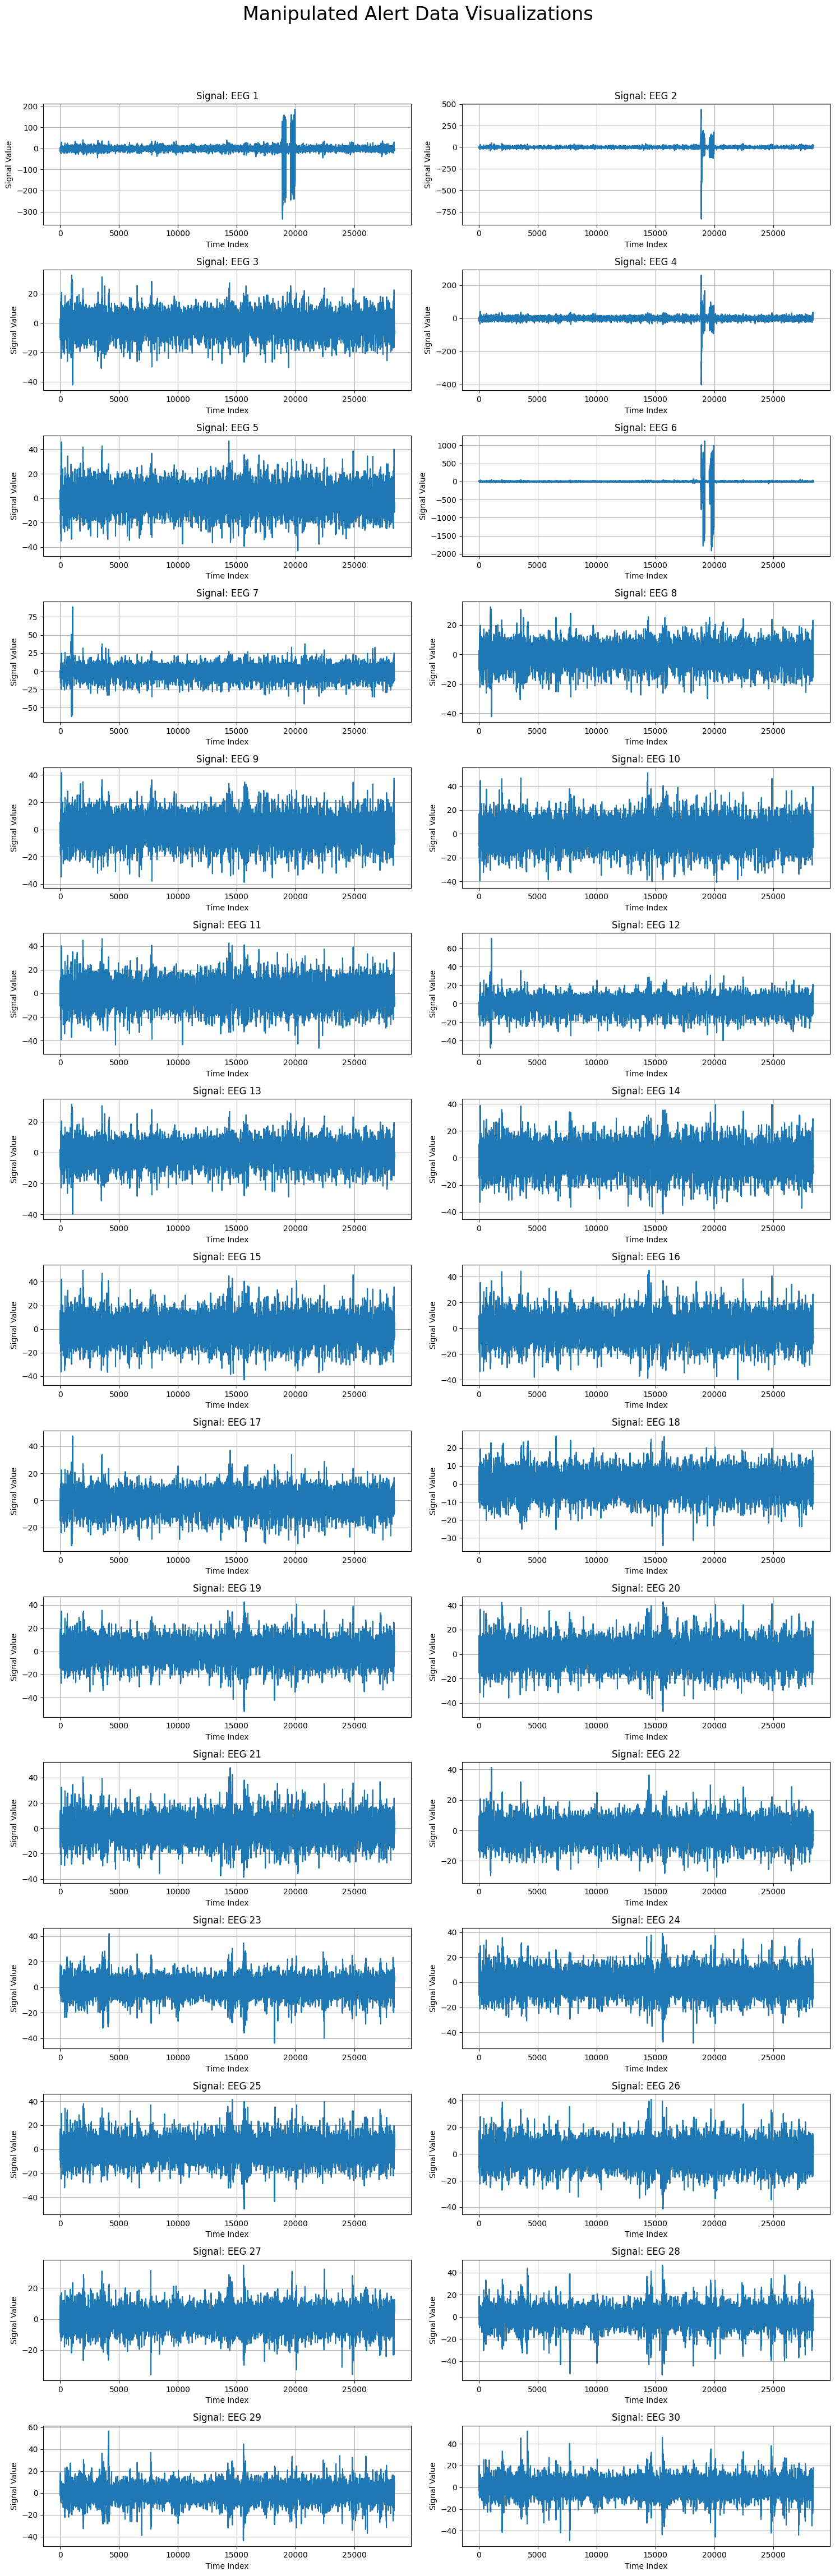

In [20]:
columns_of_interest = Manipulated_Alert_Data.columns[:-1]

# Set up subplots based on the number of selected columns
num_columns = 2
num_rows = (len(columns_of_interest) + num_columns - 1) // num_columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 3 * num_rows))
axes = axes.flatten()

# Plot each signal in a separate subplot
for i, signal_column in enumerate(columns_of_interest):
    Manipulated_Alert_Data[signal_column].plot(ax=axes[i], grid=True)
    axes[i].set_title(f"Signal: {signal_column}")
    axes[i].set_xlabel('Time Index')
    axes[i].set_ylabel('Signal Value')

# Add a title
title = plt.suptitle("Manipulated Alert Data Visualizations", fontsize=24, y=1.02)


plt.tight_layout()
plt.show()

# Data Manipulation - Drowsy State

In [21]:
# Load the alert data
drowsy_data = scipy.io.loadmat('drowsy_data.mat')

# Transpose the EEGsample for each sample
transposed_drowsy_data = np.transpose(drowsy_data['EEGsample'], (0, 2, 1))

transposed_drowsy_data.shape

(74, 384, 30)

In [22]:
# Concatenate all the samples together
Manipulated_drowsy_data = np.concatenate(transposed_drowsy_data, axis=0)

Manipulated_drowsy_data.shape

(28416, 30)

In [23]:
# Create a new dataframe with the concatenated EEG values
Manipulated_drowsy_data = pd.DataFrame(Manipulated_drowsy_data)

In [24]:
Manipulated_drowsy_data.columns = ['EEG {}'.format(i) for i in range(1, 31)]

Manipulated_drowsy_data['substate'] = 1

Manipulated_drowsy_data

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
0,0.082982,6.870910,1.191835,10.694183,8.772233,12.276021,2.496229,1.134560,10.744494,14.147461,...,2.433385,-2.323469,3.088985,2.219474,4.287608,0.662643,0.851973,2.290005,2.375867,1
1,-4.768461,5.015267,-3.069768,5.931647,6.128928,8.755960,-2.210493,-3.538832,6.447010,13.517757,...,0.535342,-5.261412,4.133277,6.363022,3.266964,0.040565,-1.617068,0.833451,1.549703,1
2,-8.533952,1.094309,-6.521348,3.483924,4.561030,1.496983,-7.413142,-6.110432,4.122456,11.178484,...,-3.087723,-6.924912,4.050310,6.162657,-0.712489,-3.203719,-3.002760,-2.878362,-0.907785,1
3,-5.807543,2.347114,-9.300970,3.765904,4.290467,4.810574,-2.874380,-9.209776,3.097994,8.733208,...,0.881304,-10.218909,-0.274625,3.832944,1.841461,-0.932544,-5.782786,-7.050165,-3.121750,1
4,-3.866813,4.559948,-9.386589,-0.439350,3.696505,9.278416,1.009143,-10.485544,-0.387257,3.097324,...,2.411021,-12.637500,-8.126735,-2.565534,-1.024085,-0.872861,-6.815514,-10.055988,-4.110810,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28411,-5.293150,-4.456394,-1.024749,-3.660054,-2.500694,-4.508658,-4.833031,-0.520144,-3.077662,-1.576668,...,-4.124330,-1.193274,-5.927066,-6.444272,-4.839447,-3.813725,-2.932473,-4.219050,-1.898713,1
28412,-7.624171,-7.099891,-5.447583,-5.788299,-5.683222,-7.837167,-5.637948,-5.472151,-6.028820,-5.683501,...,-6.012441,-4.326685,-8.579801,-9.543298,-6.790696,-5.887931,-4.518092,-4.777364,-4.493083,1
28413,-6.659474,-8.053270,-7.612979,-8.506987,-9.754685,-9.636260,-6.442646,-6.915317,-9.013087,-10.438113,...,-12.962068,-8.768182,-12.068883,-15.624404,-15.991358,-13.206597,-7.742455,-9.814503,-9.931165,1
28414,-4.087851,-4.636991,-3.643008,-9.114833,-8.688035,-7.008165,-4.972972,-3.488374,-9.166580,-11.100926,...,-12.539887,-7.739932,-11.891818,-14.709814,-17.352319,-12.546342,-9.141405,-10.965888,-8.049052,1


### Manipulated Drowsy Data Visualizations

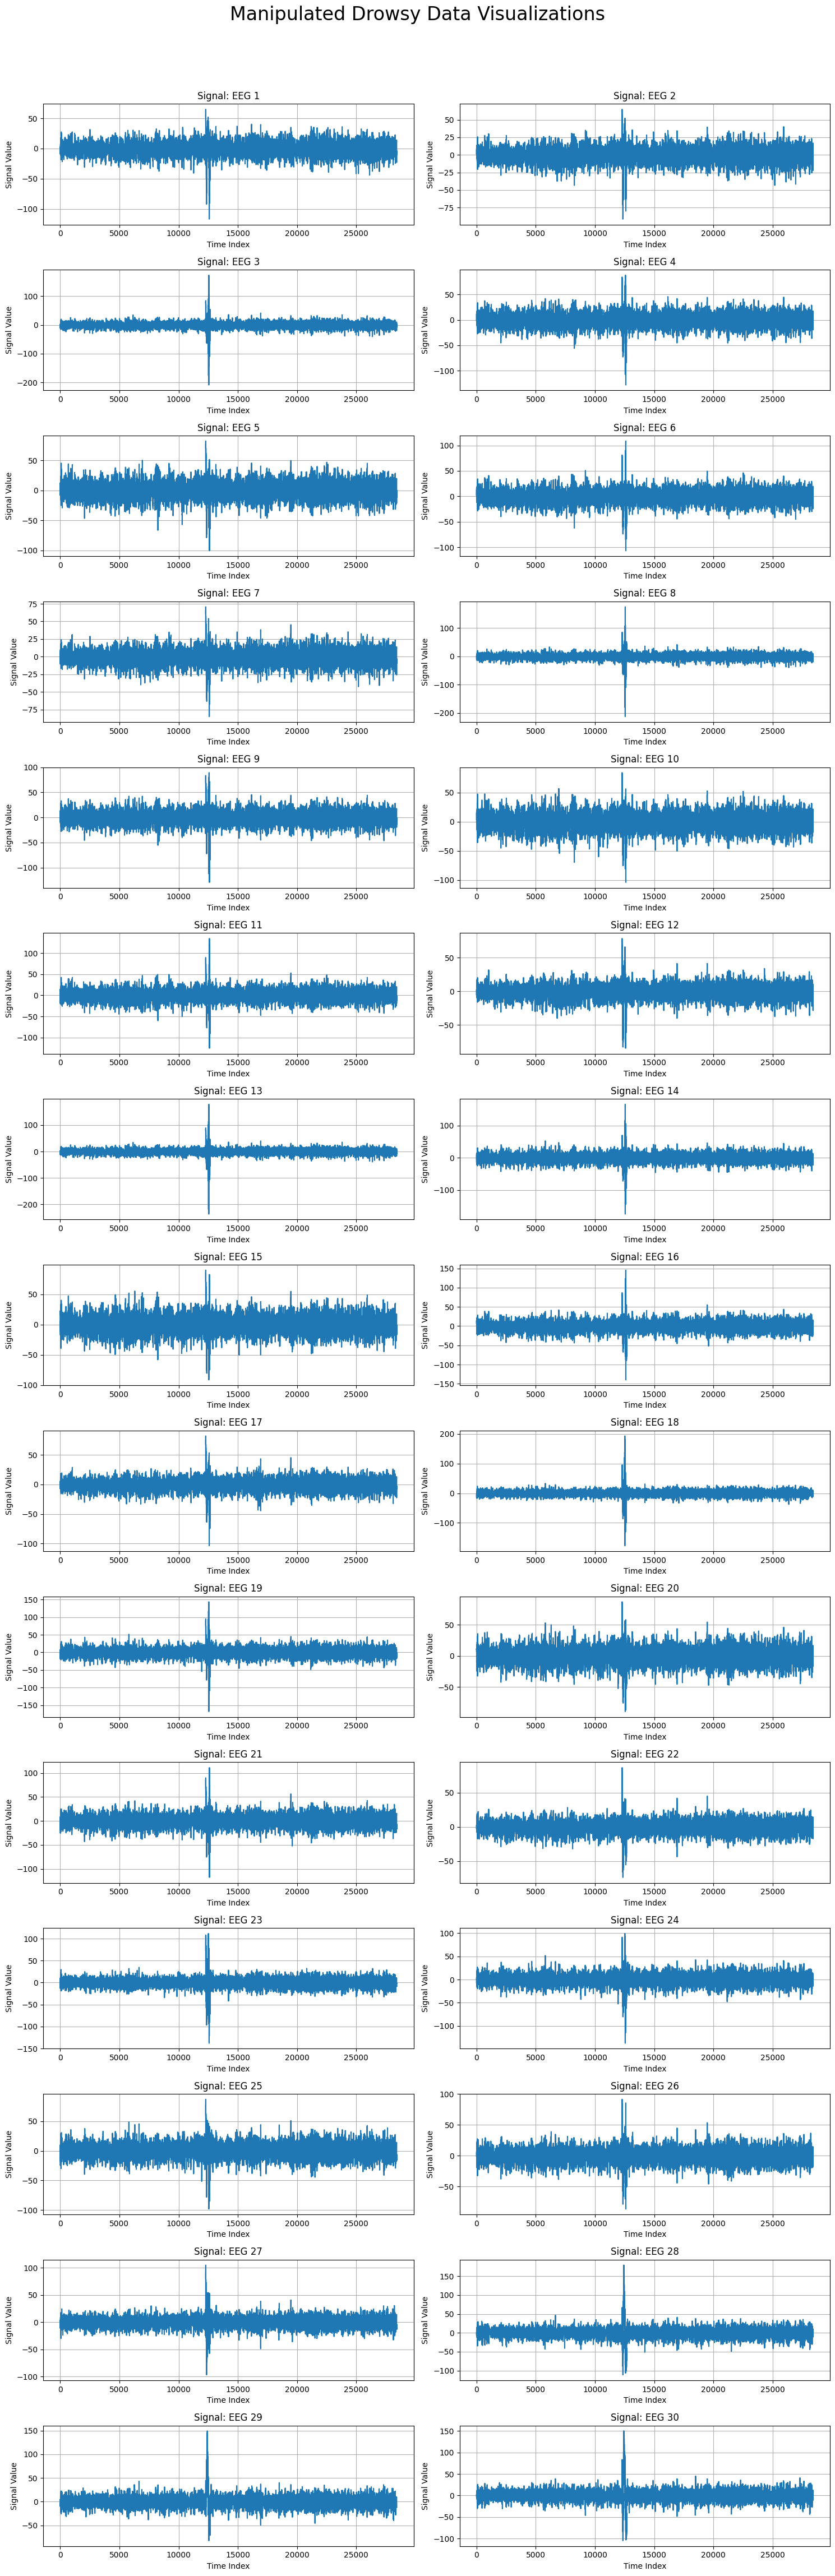

In [25]:
columns_of_interest = Manipulated_drowsy_data.columns[:-1]

# Set up subplots based on the number of selected columns
num_columns = 2
num_rows = (len(columns_of_interest) + num_columns - 1) // num_columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 3 * num_rows))
axes = axes.flatten()

# Plot each signal in a separate subplot
for i, signal_column in enumerate(columns_of_interest):
    Manipulated_drowsy_data[signal_column].plot(ax=axes[i], grid=True)
    axes[i].set_title(f"Signal: {signal_column}")
    axes[i].set_xlabel('Time Index')
    axes[i].set_ylabel('Signal Value')

# Add a title
title = plt.suptitle("Manipulated Drowsy Data Visualizations", fontsize=24, y=1.02)


plt.tight_layout()
plt.show()

# Creating new Manipulated EEG Data

In [26]:
# Concatenate them row-wise
Manipulated_EEG_Data = pd.concat([Manipulated_Alert_Data, Manipulated_drowsy_data], ignore_index=True)

Manipulated_EEG_Data = pd.DataFrame(Manipulated_EEG_Data)

Manipulated_EEG_Data

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
0,1.730655,3.372468,2.039535,4.133209,6.544353,9.560599,-0.315682,2.342269,4.912506,16.490036,...,1.749297,6.946157,11.889343,13.763596,12.035088,7.364850,13.561739,10.349382,14.370269,0
1,1.595072,1.964204,2.259066,4.647303,1.960566,6.338006,0.829771,2.243959,4.647603,10.135391,...,2.456238,11.235267,16.007425,14.447750,13.773931,8.699092,14.576873,11.074187,14.007997,0
2,1.749795,1.871438,2.707486,0.103510,-4.813622,1.191675,-0.673026,2.372443,0.429272,-0.068099,...,0.494035,9.801200,12.622714,11.481701,6.520727,4.266669,11.643261,8.249429,10.258819,0
3,-1.783008,-1.704521,0.288582,-5.922621,-6.429564,-2.056103,-3.976964,-0.054574,-4.233803,0.263877,...,-0.990026,7.098133,9.452307,8.738388,3.216439,1.794187,8.932915,5.894151,6.730068,0
4,-2.684569,-3.041845,-3.098140,-7.820998,-5.341109,-1.306795,-2.232887,-3.465687,-7.589156,-0.004918,...,-1.700765,3.463508,3.804245,4.583054,2.179175,1.696906,4.598130,3.077374,2.885790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56827,-5.293150,-4.456394,-1.024749,-3.660054,-2.500694,-4.508658,-4.833031,-0.520144,-3.077662,-1.576668,...,-4.124330,-1.193274,-5.927066,-6.444272,-4.839447,-3.813725,-2.932473,-4.219050,-1.898713,1
56828,-7.624171,-7.099891,-5.447583,-5.788299,-5.683222,-7.837167,-5.637948,-5.472151,-6.028820,-5.683501,...,-6.012441,-4.326685,-8.579801,-9.543298,-6.790696,-5.887931,-4.518092,-4.777364,-4.493083,1
56829,-6.659474,-8.053270,-7.612979,-8.506987,-9.754685,-9.636260,-6.442646,-6.915317,-9.013087,-10.438113,...,-12.962068,-8.768182,-12.068883,-15.624404,-15.991358,-13.206597,-7.742455,-9.814503,-9.931165,1
56830,-4.087851,-4.636991,-3.643008,-9.114833,-8.688035,-7.008165,-4.972972,-3.488374,-9.166580,-11.100926,...,-12.539887,-7.739932,-11.891818,-14.709814,-17.352319,-12.546342,-9.141405,-10.965888,-8.049052,1


In [27]:
Manipulated_EEG_Data.describe()

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
count,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,...,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000,56832.000000
mean,-0.017346,-0.066091,-0.034656,-0.046466,-0.074795,-0.062178,-0.066770,-0.035124,-0.050053,-0.121607,...,-0.033515,-0.070115,-0.094423,-0.097555,-0.061157,-0.019779,0.042638,0.128554,0.047237,0.500000
std,15.114577,19.166483,8.052692,14.157462,10.908744,59.827949,8.760659,8.071759,10.356118,11.656530,...,7.427163,7.965969,9.522437,9.823212,9.241192,7.466136,11.002281,9.444154,10.159864,0.500004
min,-335.147982,-835.462259,-208.160484,-403.027073,-100.695726,-1914.601674,-84.904163,-212.758350,-129.320812,-103.806592,...,-73.697114,-137.921451,-137.418180,-98.038632,-86.178014,-96.573654,-111.033889,-82.105822,-104.977015,0.000000
25%,-5.514294,-5.519736,-4.374222,-6.276887,-6.696756,-6.762017,-4.960045,-4.395647,-6.248351,-7.275310,...,-4.416670,-4.427360,-5.798793,-6.134631,-5.720223,-4.443530,-5.254996,-4.863132,-5.062564,0.000000
50%,0.108493,0.083038,0.065760,0.112657,0.059166,0.084103,0.121500,0.092081,0.091694,-0.078041,...,0.090605,0.002642,0.005826,-0.033874,-0.052078,0.049117,0.147263,0.090489,0.050876,0.500000
75%,5.690979,5.437829,4.523079,6.330062,6.641343,6.738943,5.077444,4.513315,6.289416,7.054210,...,4.521173,4.410490,5.692343,5.910085,5.662211,4.427844,5.422980,5.027766,5.174389,1.000000
max,185.729500,438.345674,172.740818,260.715083,82.076379,1116.638265,88.620618,175.284422,89.324357,84.255400,...,86.404769,111.799695,99.369526,86.730979,91.346750,104.784533,179.167203,149.156242,149.996483,1.000000


In [28]:
Manipulated_EEG_Data.shape

(56832, 31)

In [29]:
Manipulated_EEG_Data["substate"].value_counts()

0    28416
1    28416
Name: substate, dtype: int64

# Shuffle Dataset

In [30]:
from sklearn.utils import shuffle

# Shuffle the combined dataset
shuffled_data = shuffle(Manipulated_EEG_Data, random_state=42)

# Display the resulting shuffled DataFrame
print(shuffled_data.head())

            EEG 1       EEG 2      EEG 3      EEG 4      EEG 5       EEG 6  \
50620    7.927971    4.951817   4.406394  10.035297  10.757104   14.952167   
2182     3.602936   -4.828860  -0.223590  -8.323427  -7.446350  -23.972179   
19860  100.341909  103.038154  -7.247578  -8.487461  -6.360217 -925.960573   
44552   -5.361678   -3.298747   1.560424  -1.578421   0.816825    0.060660   
45969  -19.730152  -12.512124 -10.799817 -13.819659 -23.504713  -17.171136   

           EEG 7      EEG 8      EEG 9     EEG 10  ...    EEG 22    EEG 23  \
50620   6.518167   3.970163   9.373637  17.835097  ... -0.338259  2.264750   
2182   -2.908961  -1.321517  -6.826353  -8.476074  ... -1.375282  6.786877   
19860  -5.685331  -7.377014  -8.028820  -7.241624  ... -2.533495 -8.244722   
44552  -1.797724   0.768084  -1.093784   6.018064  ... -0.122800  0.065213   
45969 -12.179961 -10.570624 -13.848123 -23.022717  ... -2.921057 -0.517768   

          EEG 24    EEG 25    EEG 26    EEG 27    EEG 28    EE

In [31]:
data = shuffled_data

X = data.iloc[:, :-1] 
y = data.iloc[:, -1]  

In [32]:
X

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 21,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30
50620,7.927971,4.951817,4.406394,10.035297,10.757104,14.952167,6.518167,3.970163,9.373637,17.835097,...,4.083107,-0.338259,2.264750,3.926710,-1.154366,2.378196,1.599906,6.836159,6.424121,7.028095
2182,3.602936,-4.828860,-0.223590,-8.323427,-7.446350,-23.972179,-2.908961,-1.321517,-6.826353,-8.476074,...,-0.594875,-1.375282,6.786877,2.777887,0.820705,1.458248,1.807607,6.539737,7.101923,4.563809
19860,100.341909,103.038154,-7.247578,-8.487461,-6.360217,-925.960573,-5.685331,-7.377014,-8.028820,-7.241624,...,-9.718728,-2.533495,-8.244722,-10.576683,-7.327516,-5.047581,0.853078,0.401742,2.763029,7.041242
44552,-5.361678,-3.298747,1.560424,-1.578421,0.816825,0.060660,-1.797724,0.768084,-1.093784,6.018064,...,5.631823,-0.122800,0.065213,-2.349968,-1.453662,-0.985090,-0.736923,-3.081872,-4.623946,-12.324394
45969,-19.730152,-12.512124,-10.799817,-13.819659,-23.504713,-17.171136,-12.179961,-10.570624,-13.848123,-23.022717,...,-1.825162,-2.921057,-0.517768,0.646241,0.358445,3.074135,0.505050,6.662435,4.536646,2.828765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,29.798473,37.807621,31.405085,40.561079,42.778183,40.003267,30.885089,30.445919,40.615891,43.865056,...,35.922536,15.581788,5.971013,31.562368,30.833737,23.329331,0.517512,3.974317,6.125410,-2.788537
38158,16.336443,14.658059,13.575491,13.134057,6.916731,13.830670,5.561687,13.598032,12.089372,10.581051,...,4.828661,3.720700,11.682533,16.974552,12.876723,6.470008,4.568781,11.966398,10.690362,8.703300
860,-8.273204,-9.257407,8.377054,1.606518,-1.113927,-10.313137,-24.198172,9.460391,2.421490,2.962134,...,-1.169390,-7.953771,4.759307,-2.275657,2.162935,-2.725429,-0.981613,0.521131,-0.813960,2.045694
15795,0.006357,-9.261169,2.640473,-1.793564,-7.443168,-13.148855,-11.186437,3.029695,-2.216722,-7.004707,...,-18.798139,-22.987292,6.842763,-7.085329,-13.820497,-16.434548,-7.819645,-6.142945,-8.105850,-8.488019


In [33]:
y

50620    1
2182     0
19860    0
44552    1
45969    1
        ..
54343    1
38158    1
860      0
15795    0
56422    1
Name: substate, Length: 56832, dtype: int64

# Shapley Approximation (shap)

https://github.com/shap/shap

In [34]:
#Training and Testing Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
import shap
import xgboost as xgb

In [36]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "tree_method": "gpu_hist",
}

In [37]:
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [38]:
# Explain predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizations - Shapley Approximation (shap)

In [39]:
# Calculate feature importance
ft_importance = pd.DataFrame({"Feature Importance": np.abs(shap_values).mean(0)}, index=X_train.columns)
X_cols = ft_importance.query('`Feature Importance` > 0').sort_values(by="Feature Importance", ascending=False)

# Display
X_cols.style.background_gradient(cmap='viridis', vmin=.001, vmax=.6).format({"Feature Importance": "{:.3f}"})


,Feature Importance
EEG 2,0.325
EEG 5,0.242
EEG 6,0.241
EEG 7,0.160
EEG 30,0.147
EEG 29,0.145
EEG 28,0.144
EEG 15,0.144
EEG 23,0.132
EEG 12,0.126


### SHAP Summary Plot

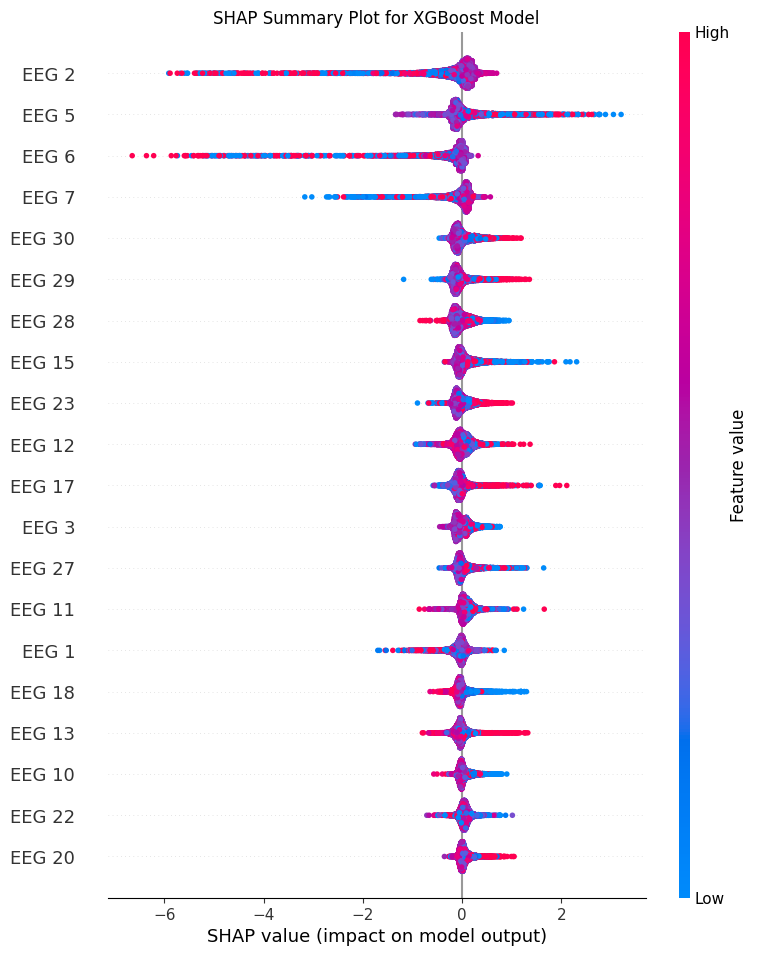

In [40]:
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot for XGBoost Model")
plt.show()

### SHAP Bar plot

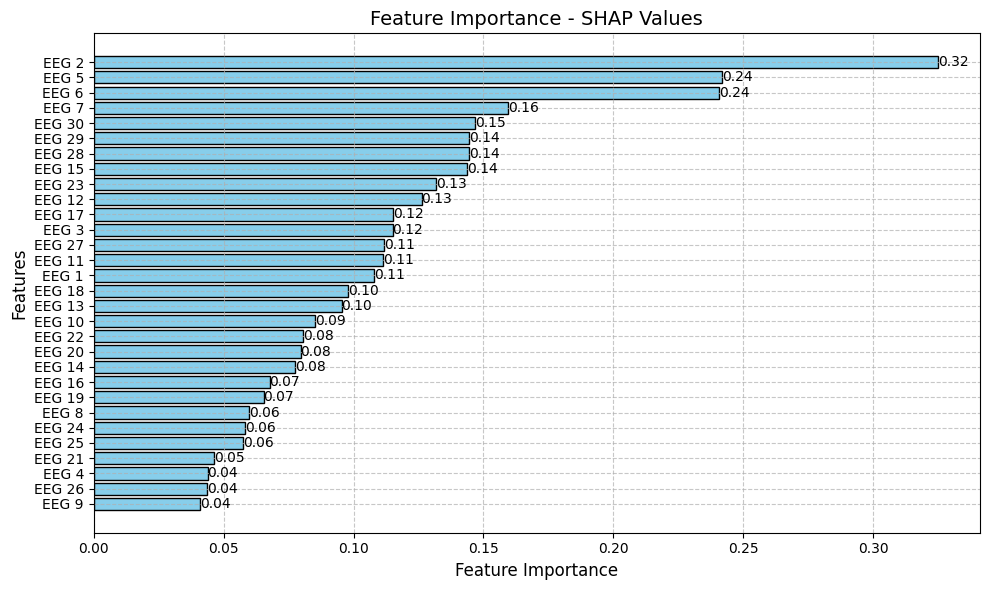

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.barh(X_cols.index, X_cols['Feature Importance'], color='skyblue', edgecolor='black')
ax.grid(axis='both', linestyle='--', alpha=0.7)
ax.set_xlabel('Feature Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Feature Importance - SHAP Values', fontsize=14)
ax.invert_yaxis()


for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            '{:.2f}'.format(bar.get_width()), 
            va='center', ha='left', fontsize=10)


plt.tight_layout()
plt.show()

### SHAP Scatter plot

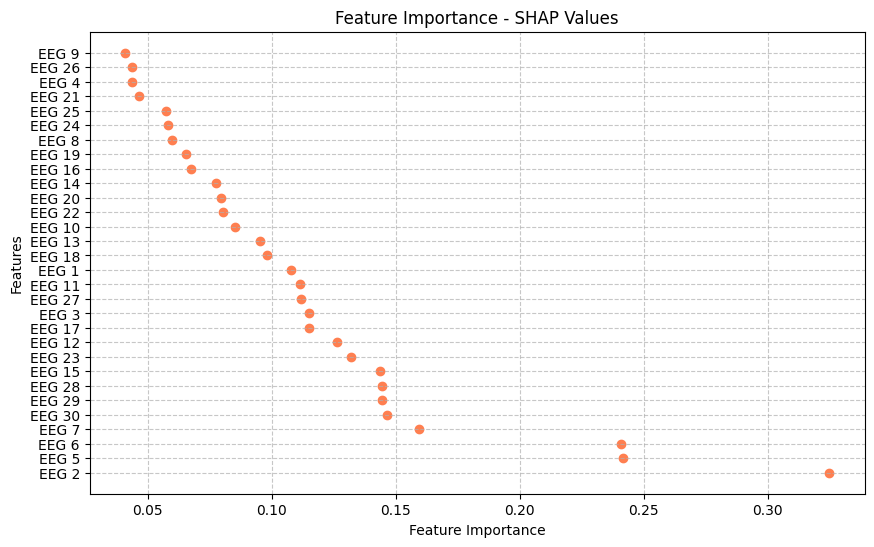

In [42]:
# Scatter plot of feature importance
plt.figure(figsize=(10, 6))
plt.scatter(X_cols['Feature Importance'], X_cols.index, color='coral')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - SHAP Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### SHAP Pie Chart

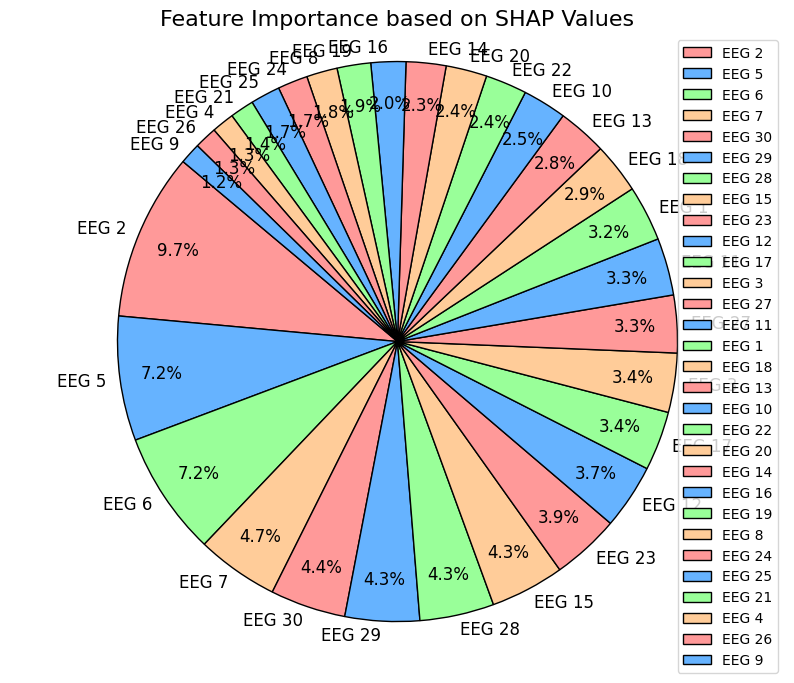

In [43]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(10, 8))


plt.pie(X_cols['Feature Importance'], 
        labels=X_cols.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,      
        wedgeprops={'edgecolor': 'black'},  
        textprops={'fontsize': 12},  
        pctdistance=0.85,     
        labeldistance=1.05)   


plt.legend(X_cols.index, loc="best")
plt.title('Feature Importance based on SHAP Values', fontsize=16)
plt.axis('equal')
plt.show()